In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from mlxtend.plotting import plot_confusion_matrix
import pickle #from sikitlearn


In [ ]:
# loading the data set
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


checking null values

In [465]:
# checking the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# checking the data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# checking the description of the data sets to know the statistics 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [468]:
# From above description we can see that glucose, bloodpressure, skinthickness, insulin, BMI columns have zero values which is not normal
# thus we are replacing these zeroes to nan
columns_to_fix = ['BloodPressure','Insulin', 'BMI', 'SkinThickness','Glucose']
df[columns_to_fix] = df[columns_to_fix].replace(0, np.nan)

In [ ]:
## checking the % of null values after replacing zero with nan
df.isnull().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [470]:
# observing traget data balance or not
df_outcome=df.Outcome.value_counts()
df_outcome

Outcome
0    500
1    268
Name: count, dtype: int64

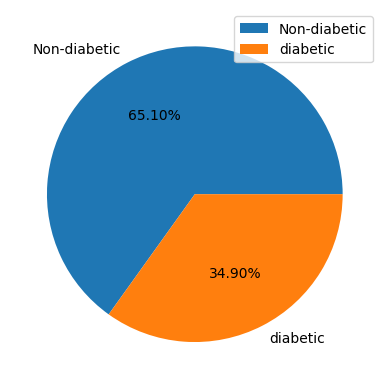

In [471]:
# making pie chart to show data imbalance of target column
plt.pie(df_outcome, autopct='%.2f%%',labels=['Non-diabetic', 'diabetic'])
plt.legend()

In [472]:
# looking correlation of fetaures and target
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


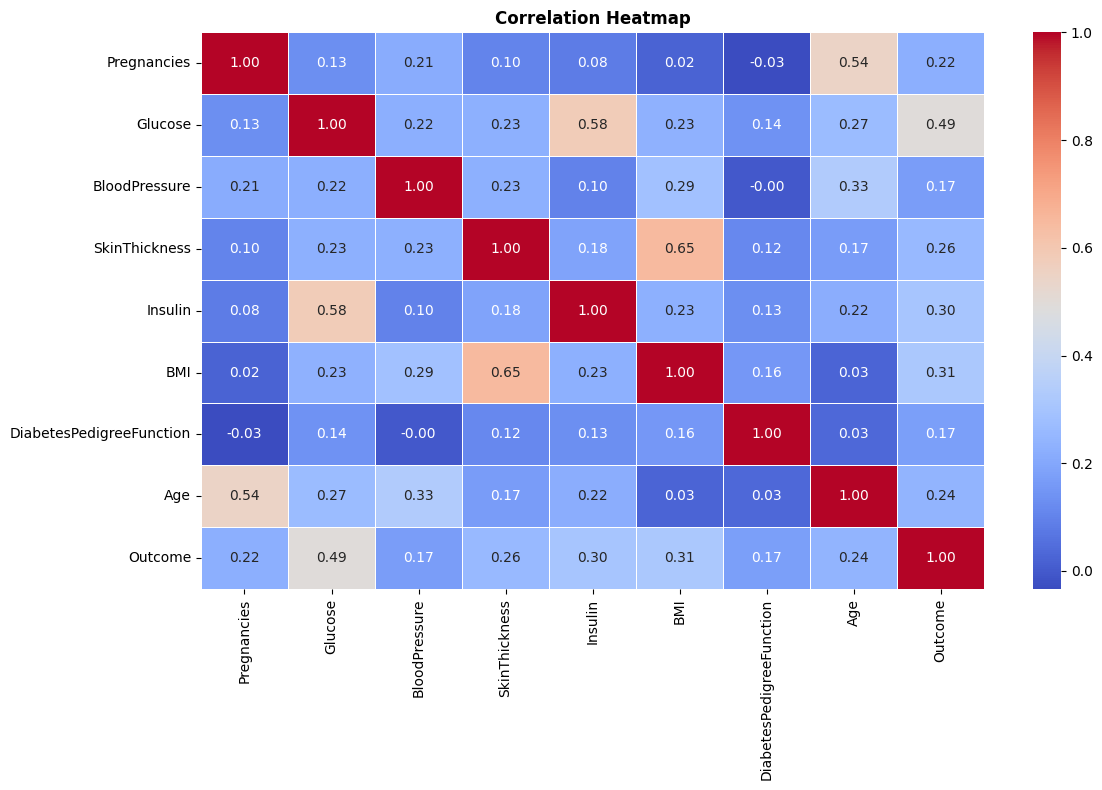

In [473]:
# making correlation heatmap to observe the correlation better

corr_df=df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontweight='bold')
plt.tight_layout()

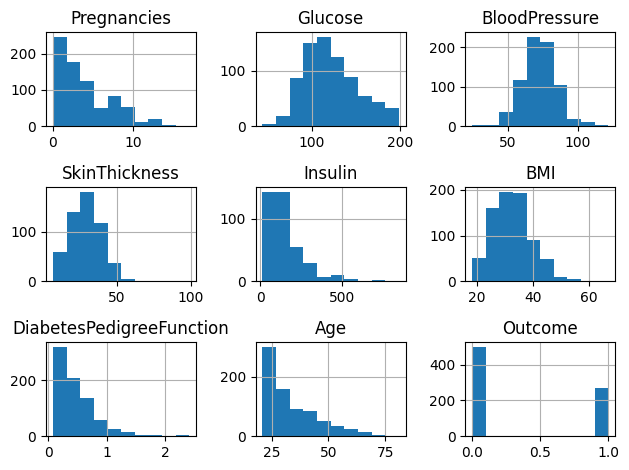

In [477]:
# observing the data distribution 
df.hist()
plt.tight_layout()

<Axes: >

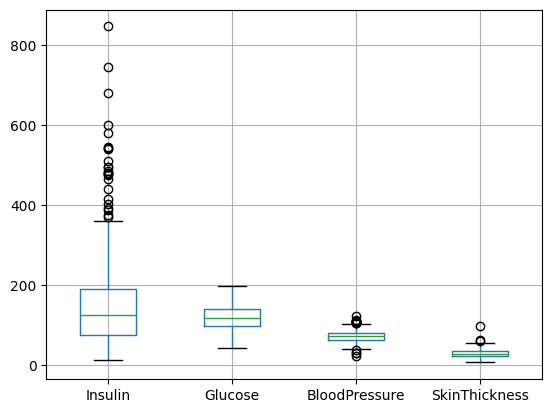

In [478]:
# checking outliers 
df[['Insulin','Glucose','BloodPressure', 'SkinThickness']].boxplot()

<Axes: >

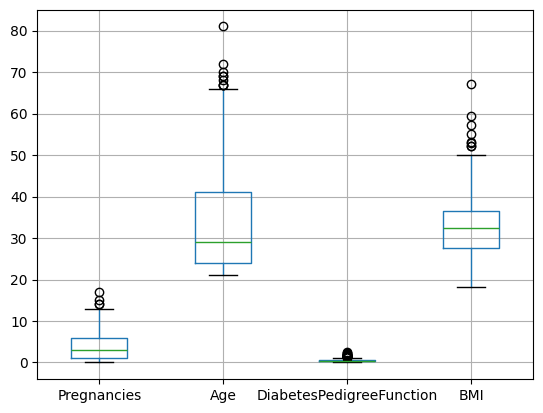

In [479]:
# checking outliers
df[['Pregnancies', 'Age', 'DiabetesPedigreeFunction', 'BMI']].boxplot()

In [480]:
# wanted to see proportion of diabeties of different age group but didn't want to add this colum to the original data set, 
# thus created a new data set
df_new=pd.DataFrame()
df_new['age_group']=pd.cut(df['Age'], bins=[20,40,60,81], labels=['21-40', '41-60','61-81'])
df_new1=pd.concat((df,df_new), axis=1)
df2=df_new1.age_group.value_counts().reset_index()
df2

,age_group,count
0,21-40,574
1,41-60,167
2,61-81,27


Text(0.5, 1.0, 'Count per Age-group')

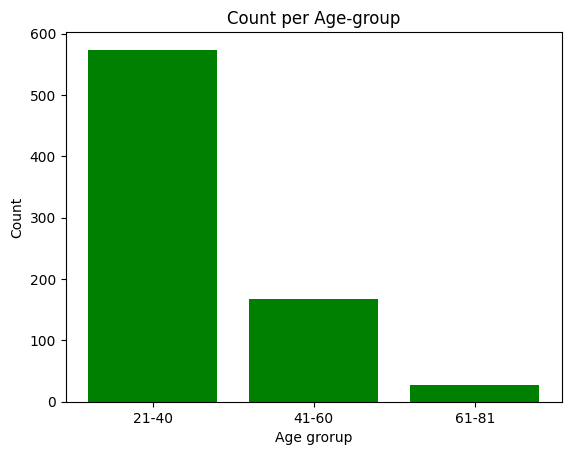

In [481]:
# visualizing  count of different age group
plt.bar(df2.age_group, df2['count'], color='g')
plt.xlabel('Age grorup')
plt.ylabel('Count')
plt.title('Count per Age-group')

In [ ]:
# making a data frame to visulaize the proportion of diabeties of different age group

df3 =df_new1[['age_group', 'Outcome']].value_counts().reset_index()
df3

,age_group,Outcome,count
0,21-40,0,408
1,21-40,1,166
2,41-60,1,95
3,41-60,0,72
4,61-81,0,20
5,61-81,1,7


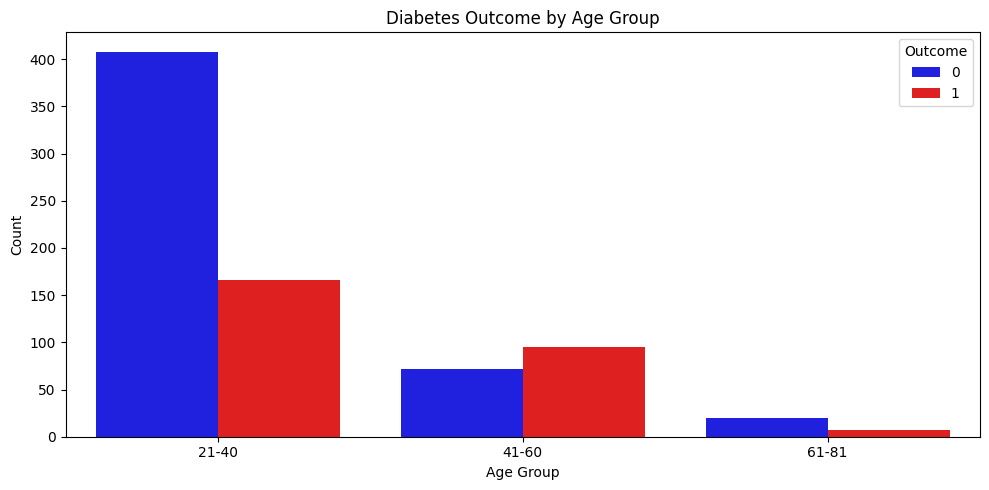

In [ ]:
# making graph to see proportion of diabeties of different age group
plt.figure(figsize=(10,5))
sns.barplot(data=df3, x='age_group', y='count', hue='Outcome', palette=["blue","red"])
plt.title('Diabetes Outcome by Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

In [ ]:
# checkinh how DiabetesPedigreeFunction impacts on diabetic outcomes
df_genetics1=df[df.DiabetesPedigreeFunction>1]
df_genetics1.Outcome.value_counts()

Outcome
1    29
0    22
Name: count, dtype: int64

Text(0, 0.5, 'Count')

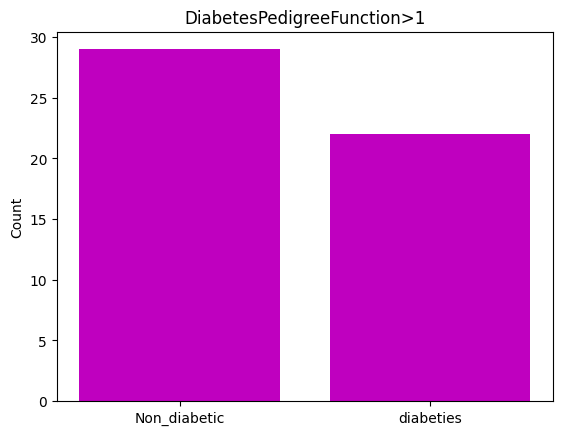

In [ ]:
# plotting DiabetesPedigreeFunction <1 impacts on diabetic outcomes

plt.bar([0,1], df_genetics1.Outcome.value_counts(), color='m')
plt.xticks([0,1], ['Non_diabetic', 'diabeties'])
plt.title('DiabetesPedigreeFunction>1')
plt.ylabel('Count')

In [488]:
# checking how DiabetesPedigreeFunction impacts on diabetic outcomes
df_genetics=df[df.DiabetesPedigreeFunction<1]
df_genetics.Outcome.value_counts()

Outcome
0    478
1    239
Name: count, dtype: int64

Text(0.5, 1.0, 'DiabetesPedigreeFunction<1')

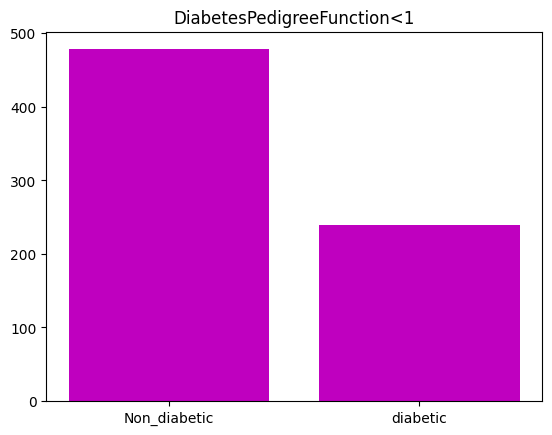

In [489]:
# plotting DiabetesPedigreeFunction <1 impacts on diabetic outcomes
plt.bar([0,1], df_genetics.Outcome.value_counts(),color='m')
plt.xticks([0,1], ['Non_diabetic', 'diabetic'])
plt.title('DiabetesPedigreeFunction<1')

In [495]:
# filling missing values with medians (as features have outliers) and mean 


df['Glucose']=df['Glucose'].fillna(df['Glucose'].mean()) # glucose column doesn't have any outliers so nan is being filled with mean

columns_list = ['Insulin', 'BMI', 'SkinThickness','BloodPressure']
for col in columns_list:
    df[col] = df[col].fillna(df[col].median())




In [496]:
# checking the nan values has been filled or not
df.isnull().sum()/len(df)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [497]:
# it is rare to have bmi more than 45 ans insuline more than 300 it looks like its a error in entry thus,I feature clipped these value
df['BMI'] = np.clip(df['BMI'], 18.2, 45 )
df['Insulin'] = np.clip(df['Insulin'], 14, 300 )

In [498]:
# assigning features and target column to x and y
x=df.iloc[:, :-1] 
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [499]:
# splitting the samples into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.2, random_state=32)


In [500]:
# scaling the data
scale= StandardScaler()
x_train =scale.fit_transform(x_train)
x_test=scale.transform(x_test)


In [501]:
# building logistic regression model
log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)
log_pred=log_reg.predict(x_test)
accuracy=accuracy_score(y_test,log_pred)
class_report= classification_report(y_test,log_pred)

# printing accuracy score
print(f'Accuracy score :{round(accuracy,3)}')
# printing classification report
print(class_report)

Accuracy score :0.792
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        99
           1       0.72      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



In [ ]:
# calulating area under curve score for the model
auc_log = roc_auc_score(y_test, log_pred)
print(round(auc_log,4))

0.7697


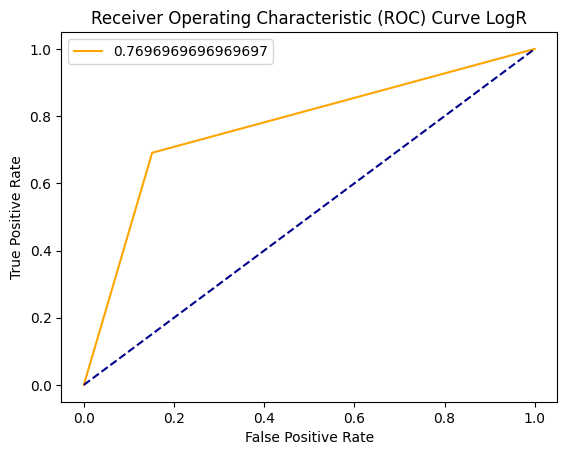

In [ ]:
# plotting a ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_pred)

plt.plot(fpr, tpr, color='orange', label=auc_log)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve LogR')
plt.legend()
plt.show()

In [534]:
#building neural network with one layer

## to avaoid the confusion between diferrent models, I am assigning different name to my data frame for neural network 

df1=pd.read_csv('diabetes.csv')

# filling zero values with nan

columns_to_fix = ['BloodPressure','Insulin', 'BMI', 'SkinThickness','Glucose']
df1[columns_to_fix] = df1[columns_to_fix].replace(0, np.nan)

# filling missing values with medians and mean
df1['Glucose']=df1['Glucose'].fillna(df1['Glucose'].mean())

columns_list = ['Insulin', 'BMI', 'SkinThickness','BloodPressure']
for col in columns_list:
    df1[col] = df1[col].fillna(df1[col].median())

# feature clipping
df1['BMI'] = np.clip(df1['BMI'], 18.2, 45 )
df1['Insulin'] = np.clip(df1['Insulin'], 14, 300 )


# Assigning features and target variable and  spliiting into training and tesing set
X=df1.iloc[:, :-1] 
Y=df1['Outcome']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=.2, random_state=32)

# Scaling values 
scale= StandardScaler()
X_train =scale.fit_transform(X_train)
X_test=scale.transform(X_test)



In [537]:
## making a nueral network with one layer
model = Sequential() 

# input layer 
model.add(Input(shape=(8,)))

# Hidden layer 1
model.add(Dense(units=4, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.4))


# Output layer for binary classification 
model.add(Dense(units=1, kernel_initializer='he_uniform', activation='sigmoid')) 

# Compile the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train, batch_size=15, epochs=40, validation_split=0.25) 

Epoch 1/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4997 - loss: 0.7714 - val_accuracy: 0.5130 - val_loss: 0.7446
Epoch 2/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4922 - loss: 0.8244 - val_accuracy: 0.5260 - val_loss: 0.7256
Epoch 3/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4767 - loss: 0.8027 - val_accuracy: 0.5519 - val_loss: 0.7093
Epoch 4/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6072 - loss: 0.7386 - val_accuracy: 0.5649 - val_loss: 0.6946
Epoch 5/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5630 - loss: 0.7593 - val_accuracy: 0.5909 - val_loss: 0.6806
Epoch 6/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6013 - loss: 0.7026 - val_accuracy: 0.6104 - val_loss: 0.6682
Epoch 7/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5717 - loss: 0.6972 - val_accuracy: 0.6299 - val_loss: 0.6566
Epoch 8/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6367 - loss: 0.6785 - val_accuracy: 0.6494 - va

In [538]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 64.79%


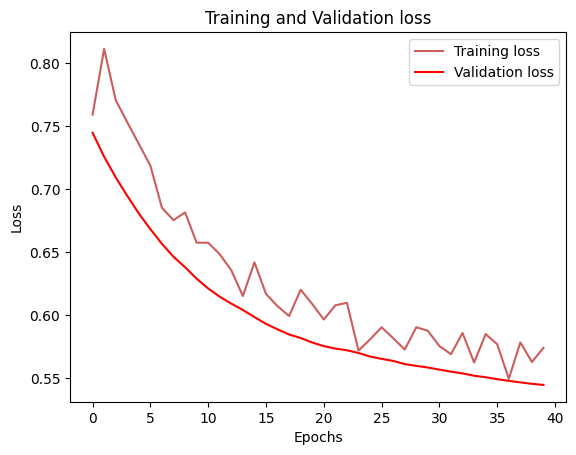

In [539]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

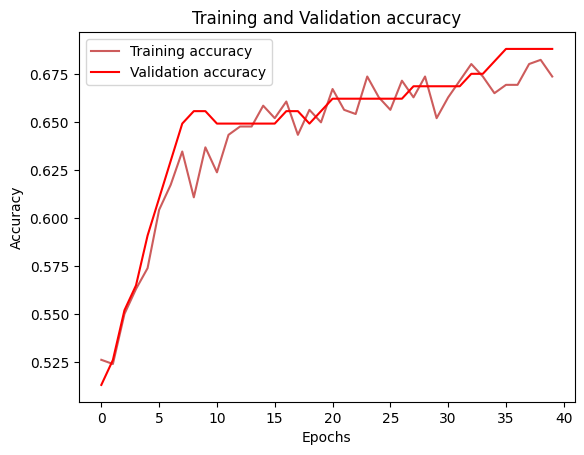

In [540]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [541]:
#####
y_pred1 = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [543]:
auc5 = roc_auc_score(Y_test, y_pred1)
print(round(auc5,4))

0.8784


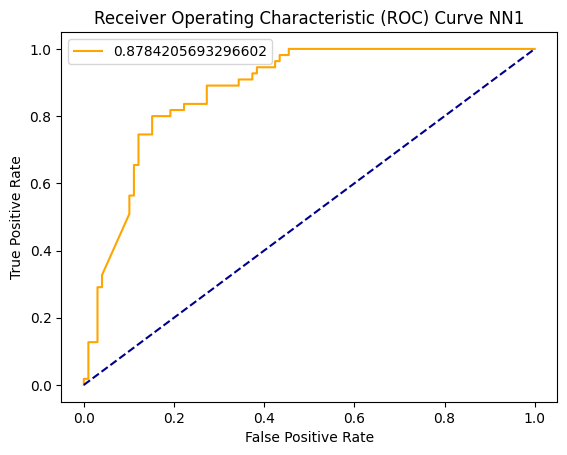

In [544]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred1)

plt.plot(fpr, tpr, color='orange', label=auc5)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve NN1')
plt.legend()
plt.show()

In [545]:
y_pred1 = np.where(y_pred1 > 0.4, 1, 0)

<Axes: >

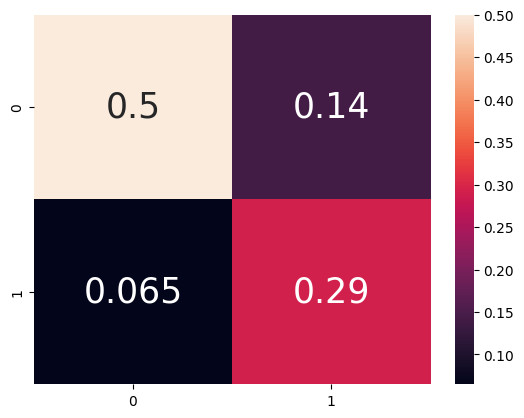

In [546]:
cf_matrix = confusion_matrix(Y_test, y_pred1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':25})

In [547]:
print(classification_report(Y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        99
           1       0.67      0.82      0.74        55

    accuracy                           0.79       154
   macro avg       0.78      0.80      0.78       154
weighted avg       0.81      0.79      0.80       154



In [548]:
# making neural network with two layers

# Initialise the model
model2 = Sequential() ## making a nueral network 

# input layer 
model2.add(Input(shape=(8,))) 

# Hidden layer 1
model2.add(Dense(units=4, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.4)) 

# Hidden layer 2
model2.add(Dense(units=2, kernel_initializer='he_uniform', activation='relu'))
model2.add(Dropout(0.2))

# Output layer for binary classification 
model2.add(Dense(units=1, kernel_initializer='he_uniform', activation='sigmoid')) 

# Compile the ANN
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history2 = model2.fit(X_train, Y_train, batch_size=15, epochs=40, validation_split=0.25) 

Epoch 1/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4942 - loss: 1.2610 - val_accuracy: 0.4481 - val_loss: 1.2794
Epoch 2/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4565 - loss: 1.1558 - val_accuracy: 0.4481 - val_loss: 1.1807
Epoch 3/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4203 - loss: 1.1750 - val_accuracy: 0.4416 - val_loss: 1.0922
Epoch 4/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4648 - loss: 0.9645 - val_accuracy: 0.4416 - val_loss: 1.0153
Epoch 5/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4436 - loss: 0.9487 - val_accuracy: 0.4610 - val_loss: 0.9534
Epoch 6/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4625 - loss: 0.8355 - val_accuracy: 0.4610 - val_loss: 0.9047
Epoch 7/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4313 - loss: 0.8294 - val_accuracy: 0.4610 - val_loss: 0.8591
Epoch 8/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5295 - loss: 0.7339 - val_accuracy: 0.4545 - v

In [549]:
val_accuracy2 = np.mean(history2.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy2*100))


val_accuracy is: 59.51%


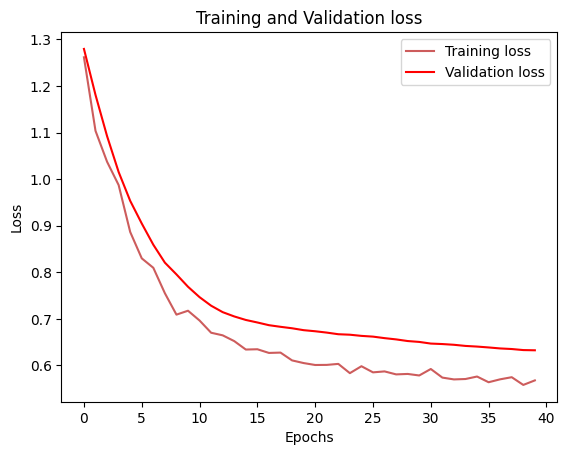

In [550]:
history_df2 = pd.DataFrame(history2.history)

plt.plot(history_df2.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df2.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

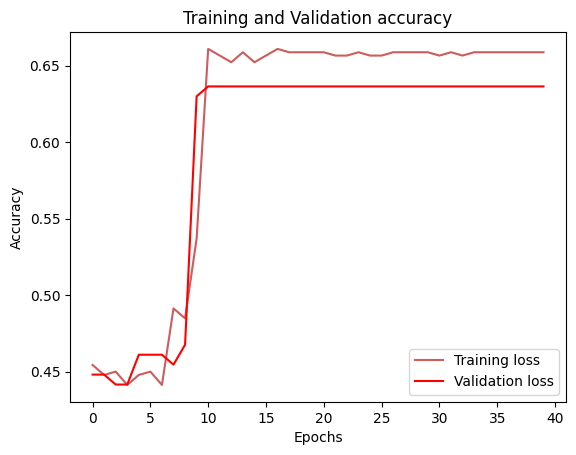

In [551]:
history_df2 = pd.DataFrame(history2.history)

plt.plot(history_df2.loc[:, ['accuracy']], "#CD5C5C", label='Training loss')
plt.plot(history_df2.loc[:, ['val_accuracy']],"#FF0000", label='Validation loss')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [552]:
y_pred2 = model2.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


In [553]:
auc2 = roc_auc_score(Y_test, y_pred2)
print(round(auc2,4))

0.7601


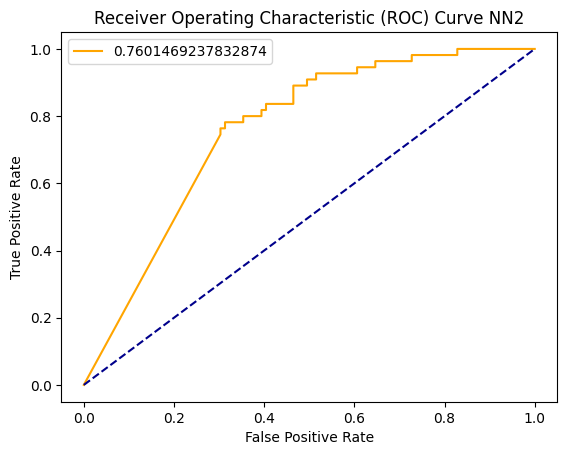

In [554]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred2)

plt.plot(fpr, tpr, color='orange', label=auc2)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve NN2')
plt.legend()
plt.show()

In [555]:
y_pred2 = np.where(y_pred2 > 0.4, 1, 0)

<Axes: >

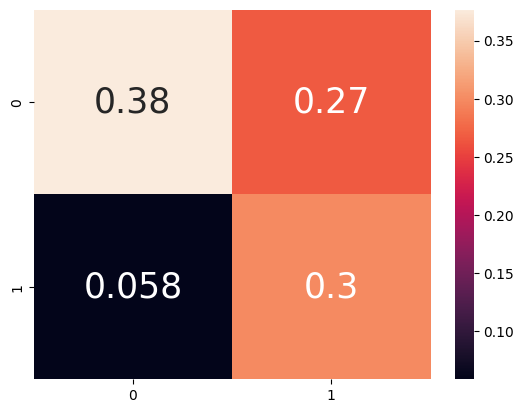

In [556]:
cf_matrix2 = confusion_matrix(Y_test, y_pred2)
sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot = True, annot_kws = {'size':25})

In [557]:
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.59      0.70        99
           1       0.53      0.84      0.65        55

    accuracy                           0.68       154
   macro avg       0.70      0.71      0.67       154
weighted avg       0.75      0.68      0.68       154

